In [2]:
import pandas as pd
import numpy as np
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay

In [3]:
ip_address = pd.read_csv("IpAddress_to_Country.csv")
fraud = pd.read_csv("Fraud_Data.csv")

In [4]:
ip_address.head()

lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China
2              16777728.0                16778239      China
3              16778240.0                16779263  Australia
4              16779264.0                16781311      China

In [5]:
fraud.head()

user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0

In [6]:
fraud.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

In [7]:
ip_address.dtypes

lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object

In [8]:
fraud['signup_time'] = pd.to_datetime(fraud['signup_time'])

In [9]:
fraud['purchase_time'] = pd.to_datetime(fraud['purchase_time'])

In [10]:
ip_address['upper_bound_ip_address']=ip_address['upper_bound_ip_address'].astype(float)

In [11]:
ip_address.dtypes

lower_bound_ip_address    float64
upper_bound_ip_address    float64
country                    object
dtype: object

In [12]:
fraud.describe(include = 'all')
#In the output of df.describe(include='all') in pandas, the column "unique" indicates the number of distinct values in a given column.

# This is only shown for object, category, or boolean data types (i.e., non-numeric columns). 

# the "top" column shows the most frequent (mode) value in a non-numeric column.
# "freq" stands for frequency, and it tells you how many times the "top" (most frequent) value appears in that column.

user_id                    signup_time  \
count   151112.000000                         151112   
unique            NaN                            NaN   
top               NaN                            NaN   
freq              NaN                            NaN   
mean    200171.040970  2015-04-20 00:56:09.511329280   
min          2.000000            2015-01-01 00:00:42   
25%     100642.500000     2015-02-18 09:52:48.500000   
50%     199958.000000            2015-04-19 04:41:30   
75%     300054.000000  2015-06-18 14:47:22.750000128   
max     400000.000000            2015-08-18 04:40:29   
std     115369.285024                            NaN   

                        purchase_time  purchase_value      device_id  source  \
count                          151112   151112.000000         151112  151112   
unique                            NaN             NaN         137956       3   
top                               NaN             NaN  CQTUVBYIWWWBC     SEO   
freq                              NaN             NaN             20   60615   
mean    2015-06-16 02:56:38.759952896       36.935372            NaN     NaN   
min               2015-01-01 00:00:44        9.000000            NaN     NaN   
25%        2015-04-18 14:41:25.500000       22.000000            NaN     NaN   
50%        2015-06-18 13:46:17.500000       35.000000            NaN     NaN   
75%        2015-08-17 18:48:31.500000       49.000000            NaN     NaN   
max               2015-12-16 02:56:05      154.000000            NaN     NaN   
std                               NaN       18.322762            NaN     NaN   

       browser     sex            age    ip_address          class  
count   151112  151112  151112.000000  1.511120e+05  151112.000000  
unique       5       2            NaN           NaN            NaN  
top     Chrome       M            NaN           NaN            NaN  
freq     61432   88293            NaN           NaN            NaN  
mean       NaN     NaN      33.140704  2.152145e+09       0.093646  
min        NaN     NaN      18.000000  5.209350e+04       0.000000  
25%        NaN     NaN      27.000000  1.085934e+09       0.000000  
50%        NaN     NaN      33.000000  2.154770e+09       0.000000  
75%        NaN     NaN      39.000000  3.243258e+09       0.000000  
max        NaN     NaN      76.000000  4.294850e+09       1.000000  
std        NaN     NaN       8.617733  1.248497e+09       0.291336

In [13]:
fraud.isna().sum()# no missing values

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [14]:
fraud['user_id'].nunique()

151112

In [15]:
ip_address.describe(include='all')

lower_bound_ip_address  upper_bound_ip_address        country
count             1.388460e+05            1.388460e+05         138846
unique                     NaN                     NaN            235
top                        NaN                     NaN  United States
freq                       NaN                     NaN          46868
mean              2.724532e+09            2.724557e+09            NaN
std               8.975215e+08            8.974979e+08            NaN
min               1.677722e+07            1.677747e+07            NaN
25%               1.919930e+09            1.920008e+09            NaN
50%               3.230887e+09            3.230888e+09            NaN
75%               3.350465e+09            3.350466e+09            NaN
max               3.758096e+09            3.758096e+09            NaN

# determine user country based on the IP address

In [16]:
# alternative approach: for loop

In [17]:
df_merge = duckdb.query("""
select 
t1.*, t2.country
FROM fraud t1
LEFT JOIN ip_address t2
ON t1.ip_address BETWEEN lower_bound_ip_address AND upper_bound_ip_address 
""").to_df()

In [18]:
df_merge.head()

user_id         signup_time       purchase_time  purchase_value  \
0     8891 2015-04-17 03:31:40 2015-04-21 22:35:14              35   
1   354047 2015-07-10 03:40:08 2015-09-13 21:16:02              34   
2   289436 2015-04-09 09:38:17 2015-06-29 08:03:10              48   
3   378954 2015-01-23 08:09:25 2015-02-18 08:58:08              20   
4   206283 2015-07-21 14:09:10 2015-07-26 00:16:09              38   

       device_id  source browser sex  age    ip_address  class  \
0  YXLYIKPTKAJMB     SEO  Chrome   M   25  1.383118e+09      0   
1  ICDHPGXRUYFHI     Ads  Chrome   M   40  1.383103e+09      0   
2  PWJWWSLTILDWL  Direct  Chrome   F   36  1.383090e+09      0   
3  VDDQHMRYURWNH     Ads      IE   M   40  1.383054e+09      0   
4  SRWUKAIPCPIPV     SEO  Safari   F   33  1.383034e+09      0   

              country  
0  Russian Federation  
1      United Kingdom  
2             Iceland  
3      United Kingdom  
4      United Kingdom

In [19]:
df_merge.dtypes

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
country                   object
dtype: object

In [20]:
df_merge.shape

(151112, 12)

In [21]:
df_merge.isnull().sum() # missing values for country

user_id               0
signup_time           0
purchase_time         0
purchase_value        0
device_id             0
source                0
browser               0
sex                   0
age                   0
ip_address            0
class                 0
country           21966
dtype: int64

In [22]:
missing_country = df_merge.query('country.isnull()')
missing_country.describe(include='all') # didn't see any trend

user_id                    signup_time  \
count    21966.000000                          21966   
unique            NaN                            NaN   
top               NaN                            NaN   
freq              NaN                            NaN   
mean    200406.924110  2015-04-21 03:59:35.927387904   
min          9.000000            2015-01-01 00:09:55   
25%     100797.500000     2015-02-19 21:08:32.500000   
50%     199912.000000            2015-04-21 01:18:52   
75%     300402.500000  2015-06-19 07:24:28.249999872   
max     399986.000000            2015-08-18 04:16:58   
std     115432.530258                            NaN   

                        purchase_time  purchase_value      device_id source  \
count                           21966    21966.000000          21966  21966   
unique                            NaN             NaN          20914      3   
top                               NaN             NaN  ITUMJCKWEYNDD    Ads   
freq                              NaN             NaN             20   8814   
mean    2015-06-17 13:48:22.393608448       36.952518            NaN    NaN   
min               2015-01-01 03:58:57        9.000000            NaN    NaN   
25%     2015-04-20 17:13:57.249999872       22.000000            NaN    NaN   
50%               2015-06-20 01:52:51       35.000000            NaN    NaN   
75%     2015-08-18 08:19:54.249999872       49.000000            NaN    NaN   
max               2015-12-14 05:35:06      127.000000            NaN    NaN   
std                               NaN       18.352332            NaN    NaN   

       browser    sex           age    ip_address         class country  
count    21966  21966  21966.000000  2.196600e+04  21966.000000       0  
unique       5      2           NaN           NaN           NaN       0  
top     Chrome      M           NaN           NaN           NaN     NaN  
freq      8872  12852           NaN           NaN           NaN     NaN  
mean       NaN    NaN     33.212965  3.676956e+09      0.085723     NaN  
min        NaN    NaN     18.000000  5.209350e+04      0.000000     NaN  
25%        NaN    NaN     27.000000  3.838070e+09      0.000000     NaN  
50%        NaN    NaN     33.000000  3.992901e+09      0.000000     NaN  
75%        NaN    NaN     39.000000  4.142563e+09      0.000000     NaN  
max        NaN    NaN     74.000000  4.294850e+09      1.000000     NaN  
std        NaN    NaN      8.631885  1.038613e+09      0.279962     NaN

In [23]:
df_merge['country']=np.where(df_merge['country'].isnull(),-1, df_merge['country'])

In [24]:
ip_address.describe(include='all')

lower_bound_ip_address  upper_bound_ip_address        country
count             1.388460e+05            1.388460e+05         138846
unique                     NaN                     NaN            235
top                        NaN                     NaN  United States
freq                       NaN                     NaN          46868
mean              2.724532e+09            2.724557e+09            NaN
std               8.975215e+08            8.974979e+08            NaN
min               1.677722e+07            1.677747e+07            NaN
25%               1.919930e+09            1.920008e+09            NaN
50%               3.230887e+09            3.230888e+09            NaN
75%               3.350465e+09            3.350466e+09            NaN
max               3.758096e+09            3.758096e+09            NaN

In [25]:
df_merge.groupby('country').size().nlargest(50)

country
United States                      58049
-1                                 21966
China                              12038
Japan                               7306
United Kingdom                      4490
Korea Republic of                   4162
Germany                             3646
France                              3161
Canada                              2975
Brazil                              2961
Italy                               1944
Australia                           1844
Netherlands                         1680
Russian Federation                  1616
India                               1310
Taiwan; Republic of China (ROC)     1237
Mexico                              1121
Sweden                              1090
Spain                               1027
South Africa                         838
Switzerland                          785
Poland                               729
Argentina                            661
Indonesia                            649
Norway  

# Build a model to predict whether an activity is fraudulent or not. 

In [26]:
df_merge.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'country'],
      dtype='object')

In [27]:
df_merge.groupby('class')['user_id'].count().reset_index(name='user_cnt') # unbalanced data

class  user_cnt
0      0    136961
1      1     14151

In [28]:
numeric_df = df_merge.select_dtypes(include='number')
numeric_df.head()

user_id  purchase_value  age    ip_address  class
0     8891              35   25  1.383118e+09      0
1   354047              34   40  1.383103e+09      0
2   289436              48   36  1.383090e+09      0
3   378954              20   40  1.383054e+09      0
4   206283              38   33  1.383034e+09      0

In [29]:
df_merge.describe(include='all')

user_id                    signup_time  \
count   151112.000000                         151112   
unique            NaN                            NaN   
top               NaN                            NaN   
freq              NaN                            NaN   
mean    200171.040970  2015-04-20 00:56:09.511329024   
min          2.000000            2015-01-01 00:00:42   
25%     100642.500000     2015-02-18 09:52:48.500000   
50%     199958.000000            2015-04-19 04:41:30   
75%     300054.000000  2015-06-18 14:47:22.750000128   
max     400000.000000            2015-08-18 04:40:29   
std     115369.285024                            NaN   

                        purchase_time  purchase_value      device_id  source  \
count                          151112   151112.000000         151112  151112   
unique                            NaN             NaN         137956       3   
top                               NaN             NaN  NGQCKIADMZORL     SEO   
freq                              NaN             NaN             20   60615   
mean    2015-06-16 02:56:38.759952640       36.935372            NaN     NaN   
min               2015-01-01 00:00:44        9.000000            NaN     NaN   
25%        2015-04-18 14:41:25.500000       22.000000            NaN     NaN   
50%        2015-06-18 13:46:17.500000       35.000000            NaN     NaN   
75%        2015-08-17 18:48:31.500000       49.000000            NaN     NaN   
max               2015-12-16 02:56:05      154.000000            NaN     NaN   
std                               NaN       18.322762            NaN     NaN   

       browser     sex            age    ip_address          class  \
count   151112  151112  151112.000000  1.511120e+05  151112.000000   
unique       5       2            NaN           NaN            NaN   
top     Chrome       M            NaN           NaN            NaN   
freq     61432   88293            NaN           NaN            NaN   
mean       NaN     NaN      33.140704  2.152145e+09       0.093646   
min        NaN     NaN      18.000000  5.209350e+04       0.000000   
25%        NaN     NaN      27.000000  1.085934e+09       0.000000   
50%        NaN     NaN      33.000000  2.154770e+09       0.000000   
75%        NaN     NaN      39.000000  3.243258e+09       0.000000   
max        NaN     NaN      76.000000  4.294850e+09       1.000000   
std        NaN     NaN       8.617733  1.248497e+09       0.291336   

              country  
count          151112  
unique            182  
top     United States  
freq            58049  
mean              NaN  
min               NaN  
25%               NaN  
50%               NaN  
75%               NaN  
max               NaN  
std               NaN

## feature engineering

## variables I'm gonna build:
### 1. days dif between sign-up time and purchase time
### 2. if different user ids using the same device 
### 3. if different users having the same ip address 

In [30]:
#device id 
device_freq = df_merge.groupby('device_id')['user_id'].count().reset_index(name='device_freq')
device_freq.head()

device_id  device_freq
0  AAALBGNHHVMKG            1
1  AAAWIHVCQELTP            1
2  AAAXJHWCLISKY            1
3  AAAXXOZJRZRAO           11
4  AABFGRPBQHWFQ            1

Text(0.5, 1.0, 'Distribution of Device Usage')

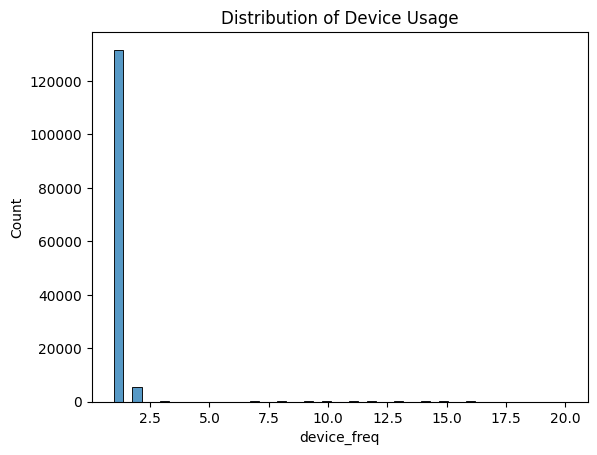

In [31]:
sns.histplot(device_freq,x='device_freq',bins = 50) # categorize device useage into 3 buckets would be best:1,2,2+
plt.title('Distribution of Device Usage')

In [32]:
conditions = [
  device_freq['device_freq'] ==1,
   device_freq['device_freq'] ==2,
   device_freq['device_freq'] >2
]
choices = ['1','2','2+']

In [33]:
device_freq['device_freq_bucket'] = np.select(conditions, choices, default = 'Unknown')

In [34]:
device_freq.head()

device_id  device_freq device_freq_bucket
0  AAALBGNHHVMKG            1                  1
1  AAAWIHVCQELTP            1                  1
2  AAAXJHWCLISKY            1                  1
3  AAAXXOZJRZRAO           11                 2+
4  AABFGRPBQHWFQ            1                  1

In [35]:
df_merge_v2 = df_merge.merge(device_freq, how ='left',on='device_id')
df_merge_v2.head()

user_id         signup_time       purchase_time  purchase_value  \
0     8891 2015-04-17 03:31:40 2015-04-21 22:35:14              35   
1   354047 2015-07-10 03:40:08 2015-09-13 21:16:02              34   
2   289436 2015-04-09 09:38:17 2015-06-29 08:03:10              48   
3   378954 2015-01-23 08:09:25 2015-02-18 08:58:08              20   
4   206283 2015-07-21 14:09:10 2015-07-26 00:16:09              38   

       device_id  source browser sex  age    ip_address  class  \
0  YXLYIKPTKAJMB     SEO  Chrome   M   25  1.383118e+09      0   
1  ICDHPGXRUYFHI     Ads  Chrome   M   40  1.383103e+09      0   
2  PWJWWSLTILDWL  Direct  Chrome   F   36  1.383090e+09      0   
3  VDDQHMRYURWNH     Ads      IE   M   40  1.383054e+09      0   
4  SRWUKAIPCPIPV     SEO  Safari   F   33  1.383034e+09      0   

              country  device_freq device_freq_bucket  
0  Russian Federation            1                  1  
1      United Kingdom            1                  1  
2             Iceland            1                  1  
3      United Kingdom            1                  1  
4      United Kingdom            1                  1

In [36]:
(df_merge_v2['signup_time']>df_merge_v2['purchase_time']).sum()

np.int64(0)

In [37]:
df_merge_v2['days_dif']=(df_merge_v2['purchase_time']-df_merge_v2['signup_time']).dt.days
df_merge_v2.head()

user_id         signup_time       purchase_time  purchase_value  \
0     8891 2015-04-17 03:31:40 2015-04-21 22:35:14              35   
1   354047 2015-07-10 03:40:08 2015-09-13 21:16:02              34   
2   289436 2015-04-09 09:38:17 2015-06-29 08:03:10              48   
3   378954 2015-01-23 08:09:25 2015-02-18 08:58:08              20   
4   206283 2015-07-21 14:09:10 2015-07-26 00:16:09              38   

       device_id  source browser sex  age    ip_address  class  \
0  YXLYIKPTKAJMB     SEO  Chrome   M   25  1.383118e+09      0   
1  ICDHPGXRUYFHI     Ads  Chrome   M   40  1.383103e+09      0   
2  PWJWWSLTILDWL  Direct  Chrome   F   36  1.383090e+09      0   
3  VDDQHMRYURWNH     Ads      IE   M   40  1.383054e+09      0   
4  SRWUKAIPCPIPV     SEO  Safari   F   33  1.383034e+09      0   

              country  device_freq device_freq_bucket  days_dif  
0  Russian Federation            1                  1         4  
1      United Kingdom            1                  1        65  
2             Iceland            1                  1        80  
3      United Kingdom            1                  1        26  
4      United Kingdom            1                  1         4

In [38]:
country_freq = df_merge_v2.groupby('country')['user_id'].count().reset_index(name='country_freq').sort_values(by='country_freq',ascending=False)

In [39]:
country_freq.head(10)

country  country_freq
172      United States         58049
0                   -1         21966
37               China         12038
85               Japan          7306
171     United Kingdom          4490
89   Korea Republic of          4162
65             Germany          3646
61              France          3161
33              Canada          2975
25              Brazil          2961

Text(0.5, 1.0, 'dist of country')

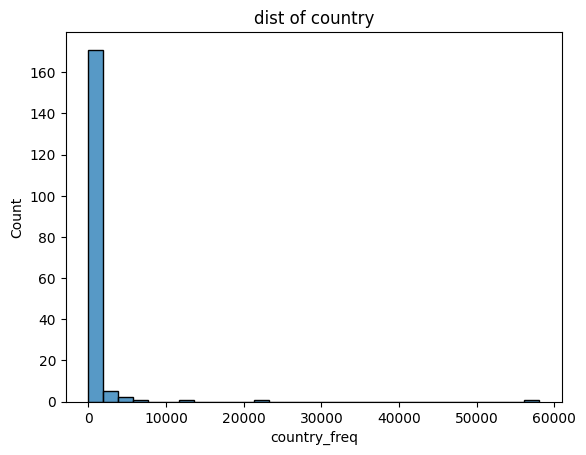

In [40]:
sns.histplot(country_freq,x='country_freq',bins = 30) # for country freq < 10K, group them together and refer to other
plt.title('dist of country')

In [41]:
conditions = [
df_merge_v2['country'] =='United States',
df_merge_v2['country'] == -1,
df_merge_v2['country'] == 'China',
~df_merge_v2['country'].isin(['United States',-1,'China'])
]
choices = ['United States','Missing','China','Other']

In [42]:
df_merge_v2['country_bucket'] = np.select(conditions, choices, default = 'Unknown')
# this binning lose too much info, so I changed bins

In [43]:
#get countries from 51 to last one
bottom_countries = list(df_merge_v2.groupby('country').size().sort_values(ascending=False)[50:].index)


In [44]:
x = dict.fromkeys(bottom_countries, 'Other')

In [45]:
df_merge_v2['country'] = df_merge_v2['country'].replace(x)

In [46]:
df_merge_v2.describe(include='all')

user_id                    signup_time  \
count   151112.000000                         151112   
unique            NaN                            NaN   
top               NaN                            NaN   
freq              NaN                            NaN   
mean    200171.040970  2015-04-20 00:56:09.511329024   
min          2.000000            2015-01-01 00:00:42   
25%     100642.500000     2015-02-18 09:52:48.500000   
50%     199958.000000            2015-04-19 04:41:30   
75%     300054.000000  2015-06-18 14:47:22.750000128   
max     400000.000000            2015-08-18 04:40:29   
std     115369.285024                            NaN   

                        purchase_time  purchase_value      device_id  source  \
count                          151112   151112.000000         151112  151112   
unique                            NaN             NaN         137956       3   
top                               NaN             NaN  NGQCKIADMZORL     SEO   
freq                              NaN             NaN             20   60615   
mean    2015-06-16 02:56:38.759952640       36.935372            NaN     NaN   
min               2015-01-01 00:00:44        9.000000            NaN     NaN   
25%        2015-04-18 14:41:25.500000       22.000000            NaN     NaN   
50%        2015-06-18 13:46:17.500000       35.000000            NaN     NaN   
75%        2015-08-17 18:48:31.500000       49.000000            NaN     NaN   
max               2015-12-16 02:56:05      154.000000            NaN     NaN   
std                               NaN       18.322762            NaN     NaN   

       browser     sex            age    ip_address          class  \
count   151112  151112  151112.000000  1.511120e+05  151112.000000   
unique       5       2            NaN           NaN            NaN   
top     Chrome       M            NaN           NaN            NaN   
freq     61432   88293            NaN           NaN            NaN   
mean       NaN     NaN      33.140704  2.152145e+09       0.093646   
min        NaN     NaN      18.000000  5.209350e+04       0.000000   
25%        NaN     NaN      27.000000  1.085934e+09       0.000000   
50%        NaN     NaN      33.000000  2.154770e+09       0.000000   
75%        NaN     NaN      39.000000  3.243258e+09       0.000000   
max        NaN     NaN      76.000000  4.294850e+09       1.000000   
std        NaN     NaN       8.617733  1.248497e+09       0.291336   

              country    device_freq device_freq_bucket       days_dif  \
count          151112  151112.000000             151112  151112.000000   
unique             51            NaN                  3            NaN   
top     United States            NaN                  1            NaN   
freq            58049            NaN             131781            NaN   
mean              NaN       1.684367                NaN      56.609799   
min               NaN       1.000000                NaN       0.000000   
25%               NaN       1.000000                NaN      25.000000   
50%               NaN       1.000000                NaN      57.000000   
75%               NaN       1.000000                NaN      88.000000   
max               NaN      20.000000                NaN     119.000000   
std               NaN       2.616954                NaN      36.142085   

       country_bucket  
count          151112  
unique              4  
top             Other  
freq            59059  
mean              NaN  
min               NaN  
25%               NaN  
50%               NaN  
75%               NaN  
max               NaN  
std               NaN

In [47]:
df_merge_v2.country_bucket.unique()

array(['Other', 'United States', 'China', 'Missing'], dtype=object)

In [48]:
## if dif user uses same ip_address
df_merge_v2['ip_freq'] = df_merge_v2.groupby('ip_address')['ip_address'].transform('count')

Text(0.5, 1.0, 'ip_address distribution')

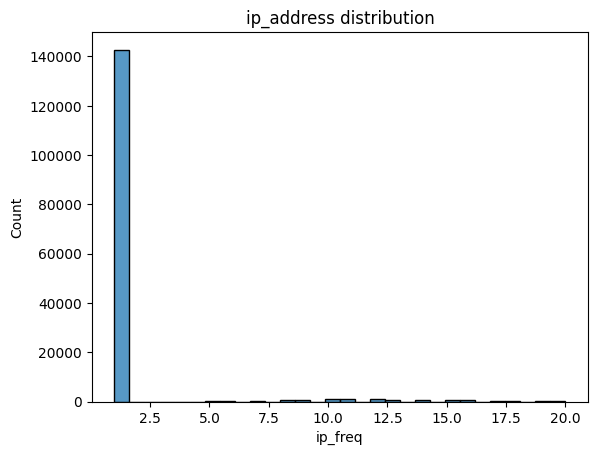

In [49]:
sns.histplot(df_merge_v2, x='ip_freq',bins = 30)
plt.title('ip_address distribution')

Text(0.5, 1.0, 'ip_address distribution excluding ip_freq>1')

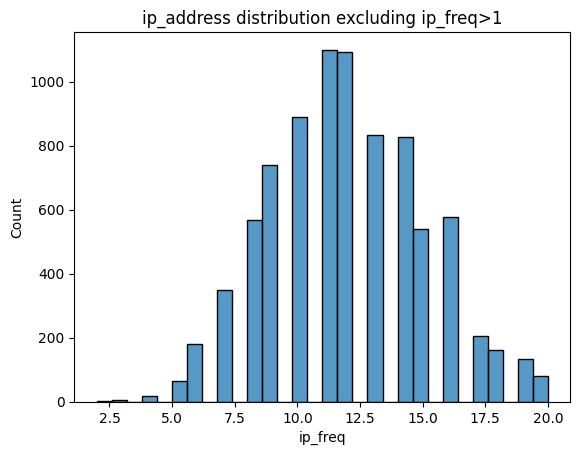

In [50]:
sns.histplot(df_merge_v2.query('ip_freq>1'), x='ip_freq',bins = 30)
plt.title('ip_address distribution excluding ip_freq>1')
# Users accessing from ~10–12 IPs may reflect:
    # Mobile + desktop use
    # Home, work, and public networks
    # Dynamic IPs (e.g., mobile carriers)
    # Sharing accounts
    # Using bots, VPNs, or rotating proxies

In [51]:
clean_df = df_merge_v2.drop(columns =['signup_time','purchase_time','device_id','ip_address','country_bucket'])
clean_df.head()

user_id  purchase_value  source browser sex  age  class  \
0     8891              35     SEO  Chrome   M   25      0   
1   354047              34     Ads  Chrome   M   40      0   
2   289436              48  Direct  Chrome   F   36      0   
3   378954              20     Ads      IE   M   40      0   
4   206283              38     SEO  Safari   F   33      0   

              country  device_freq device_freq_bucket  days_dif  ip_freq  
0  Russian Federation            1                  1         4        1  
1      United Kingdom            1                  1        65        1  
2               Other            1                  1        80        1  
3      United Kingdom            1                  1        26        1  
4      United Kingdom            1                  1         4        1

In [52]:
clean_df['country'].unique()

array(['Russian Federation', 'United Kingdom', 'Other', 'Italy',
       'Finland', 'Denmark', 'Austria', 'Portugal', 'Germany',
       'Czech Republic', 'Iran (ISLAMIC Republic Of)', 'Sweden', 'Spain',
       'France', 'Netherlands', 'Israel', 'Romania', 'Belgium',
       'Switzerland', 'Turkey', 'Poland', 'European Union', 'Norway',
       'Hungary', 'Ukraine', 'Saudi Arabia', 'Egypt', 'South Africa',
       'Greece', 'Ireland', 'United States', 'Canada',
       'Korea Republic of', 'India', 'Indonesia', 'Australia',
       'Hong Kong', 'China', 'Taiwan; Republic of China (ROC)', 'Japan',
       'Thailand', 'New Zealand', 'Malaysia', 'Viet Nam', 'Argentina', -1,
       'Colombia', 'Mexico', 'Venezuela', 'Chile', 'Brazil'], dtype=object)

In [53]:
clean_df['country'] = clean_df['country'].replace('Taiwan; Republic of China (ROC)', 'Taiwan')

In [54]:
clean_df['country'] = clean_df['country'].replace(-1, 'Missing')

In [55]:
df_dummy = pd.get_dummies(clean_df, dtype=float,drop_first=True)
df_dummy.head()

user_id  purchase_value  age  class  device_freq  days_dif  ip_freq  \
0     8891              35   25      0            1         4        1   
1   354047              34   40      0            1        65        1   
2   289436              48   36      0            1        80        1   
3   378954              20   40      0            1        26        1   
4   206283              38   33      0            1         4        1   

   source_Direct  source_SEO  browser_FireFox  ...  country_Taiwan  \
0            0.0         1.0              0.0  ...             0.0   
1            0.0         0.0              0.0  ...             0.0   
2            1.0         0.0              0.0  ...             0.0   
3            0.0         0.0              0.0  ...             0.0   
4            0.0         1.0              0.0  ...             0.0   

   country_Thailand  country_Turkey  country_Ukraine  country_United Kingdom  \
0               0.0             0.0              0.0                     0.0   
1               0.0             0.0              0.0                     1.0   
2               0.0             0.0              0.0                     0.0   
3               0.0             0.0              0.0                     1.0   
4               0.0             0.0              0.0                     1.0   

   country_United States  country_Venezuela  country_Viet Nam  \
0                    0.0                0.0               0.0   
1                    0.0                0.0               0.0   
2                    0.0                0.0               0.0   
3                    0.0                0.0               0.0   
4                    0.0                0.0               0.0   

   device_freq_bucket_2  device_freq_bucket_2+  
0                   0.0                    0.0  
1                   0.0                    0.0  
2                   0.0                    0.0  
3                   0.0                    0.0  
4                   0.0                    0.0  

[5 rows x 66 columns]

In [56]:
clean_df.dtypes

user_id                int64
purchase_value         int64
source                object
browser               object
sex                   object
age                    int64
class                  int64
country               object
device_freq            int64
device_freq_bucket    object
days_dif               int64
ip_freq                int64
dtype: object

In [57]:
cat_cols = list(clean_df.select_dtypes(include='object').columns)
cat_cols

['source', 'browser', 'sex', 'country', 'device_freq_bucket']

In [58]:
reference_levels = {}
for col in cat_cols:
    reference_levels[col]=sorted(clean_df[col].unique())[0]

In [59]:
reference_levels

{'source': 'Ads',
 'browser': 'Chrome',
 'sex': 'F',
 'country': 'Argentina',
 'device_freq_bucket': '1'}

## logistic regression

In [60]:
X = df_dummy.drop(columns = ['user_id','class'])
y = df_dummy['class']

In [61]:
X.columns

Index(['purchase_value', 'age', 'device_freq', 'days_dif', 'ip_freq',
       'source_Direct', 'source_SEO', 'browser_FireFox', 'browser_IE',
       'browser_Opera', 'browser_Safari', 'sex_M', 'country_Australia',
       'country_Austria', 'country_Belgium', 'country_Brazil',
       'country_Canada', 'country_Chile', 'country_China', 'country_Colombia',
       'country_Czech Republic', 'country_Denmark', 'country_Egypt',
       'country_European Union', 'country_Finland', 'country_France',
       'country_Germany', 'country_Greece', 'country_Hong Kong',
       'country_Hungary', 'country_India', 'country_Indonesia',
       'country_Iran (ISLAMIC Republic Of)', 'country_Ireland',
       'country_Israel', 'country_Italy', 'country_Japan',
       'country_Korea Republic of', 'country_Malaysia', 'country_Mexico',
       'country_Missing', 'country_Netherlands', 'country_New Zealand',
       'country_Norway', 'country_Other', 'country_Poland', 'country_Portugal',
       'country_Romania', 'c

In [62]:
X.head()

purchase_value  age  device_freq  days_dif  ip_freq  source_Direct  \
0              35   25            1         4        1            0.0   
1              34   40            1        65        1            0.0   
2              48   36            1        80        1            1.0   
3              20   40            1        26        1            0.0   
4              38   33            1         4        1            0.0   

   source_SEO  browser_FireFox  browser_IE  browser_Opera  ...  \
0         1.0              0.0         0.0            0.0  ...   
1         0.0              0.0         0.0            0.0  ...   
2         0.0              0.0         0.0            0.0  ...   
3         0.0              0.0         1.0            0.0  ...   
4         1.0              0.0         0.0            0.0  ...   

   country_Taiwan  country_Thailand  country_Turkey  country_Ukraine  \
0             0.0               0.0             0.0              0.0   
1             0.0               0.0             0.0              0.0   
2             0.0               0.0             0.0              0.0   
3             0.0               0.0             0.0              0.0   
4             0.0               0.0             0.0              0.0   

   country_United Kingdom  country_United States  country_Venezuela  \
0                     0.0                    0.0                0.0   
1                     1.0                    0.0                0.0   
2                     0.0                    0.0                0.0   
3                     1.0                    0.0                0.0   
4                     1.0                    0.0                0.0   

   country_Viet Nam  device_freq_bucket_2  device_freq_bucket_2+  
0               0.0                   0.0                    0.0  
1               0.0                   0.0                    0.0  
2               0.0                   0.0                    0.0  
3               0.0                   0.0                    0.0  
4               0.0                   0.0                    0.0  

[5 rows x 64 columns]

In [63]:
# try device_freq
X = X.drop(columns ='device_freq')

In [64]:
X_copy = X.copy()

In [65]:
scale_cols = ['purchase_value', 'age','days_dif','ip_freq']

In [66]:
# Scale only numeric continuous columns
#After scaling, can interpret feature importance more fairly — because they’re on the same scale.
scaler = StandardScaler()
X_copy[scale_cols] = scaler.fit_transform(X_copy[scale_cols])

In [67]:
X_copy.head()

purchase_value       age  days_dif   ip_freq  source_Direct  source_SEO  \
0       -0.105627 -0.944649 -1.455643 -0.232151            0.0         1.0   
1       -0.160204  0.795954  0.232146 -0.232151            0.0         0.0   
2        0.603875  0.331793  0.647176 -0.232151            1.0         0.0   
3       -0.924284  0.795954 -0.846932 -0.232151            0.0         0.0   
4        0.058104 -0.016327 -1.455643 -0.232151            0.0         1.0   

   browser_FireFox  browser_IE  browser_Opera  browser_Safari  ...  \
0              0.0         0.0            0.0             0.0  ...   
1              0.0         0.0            0.0             0.0  ...   
2              0.0         0.0            0.0             0.0  ...   
3              0.0         1.0            0.0             0.0  ...   
4              0.0         0.0            0.0             1.0  ...   

   country_Taiwan  country_Thailand  country_Turkey  country_Ukraine  \
0             0.0               0.0             0.0              0.0   
1             0.0               0.0             0.0              0.0   
2             0.0               0.0             0.0              0.0   
3             0.0               0.0             0.0              0.0   
4             0.0               0.0             0.0              0.0   

   country_United Kingdom  country_United States  country_Venezuela  \
0                     0.0                    0.0                0.0   
1                     1.0                    0.0                0.0   
2                     0.0                    0.0                0.0   
3                     1.0                    0.0                0.0   
4                     1.0                    0.0                0.0   

   country_Viet Nam  device_freq_bucket_2  device_freq_bucket_2+  
0               0.0                   0.0                    0.0  
1               0.0                   0.0                    0.0  
2               0.0                   0.0                    0.0  
3               0.0                   0.0                    0.0  
4               0.0                   0.0                    0.0  

[5 rows x 63 columns]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_copy,y,test_size=0.2, random_state=42)

In [72]:
model= LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
#  it uses the lbfgs solver and why:
# Handles L2 regularization
# Works well with small to medium datasets
# Supports multiclass and binary classification

LogisticRegression(class_weight='balanced')

In [73]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     27408
           1       0.52      0.73      0.61      2815

    accuracy                           0.91     30223
   macro avg       0.74      0.83      0.78     30223
weighted avg       0.93      0.91      0.92     30223



In [74]:
confusion_matrix(y_test, y_pred)

array([[25501,  1907],
       [  760,  2055]])

## try random forest 

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [76]:
#build the model
rf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=3, oob_score=True)

In [77]:
rf.oob_score_ 
# out-of-bag evaluation — 
# uses unused samples (not in each tree’s bootstrap sample) to estimate accuracy. This acts like internal cross-validation.


0.9547601518748604

In [78]:
pd.DataFrame(confusion_matrix(y_train, rf.oob_decision_function_[:,1].round(), labels=[0, 1]))

0     1
0  109262   291
1    5178  6158

In [79]:
#and let's print test accuracy and confusion matrix
print(
"Test accuracy is", rf.score(X_test,y_test), 
"\n", 
"Test Set Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(y_test, rf.predict(X_test), labels=[0, 1]))
)

Test accuracy is 0.95662243986368 
 Test Set Confusion Matrix 
        0     1
0  27352    56
1   1255  1560


In [80]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27408
           1       0.97      0.55      0.70      2815

    accuracy                           0.96     30223
   macro avg       0.96      0.78      0.84     30223
weighted avg       0.96      0.96      0.95     30223



### model evaluation

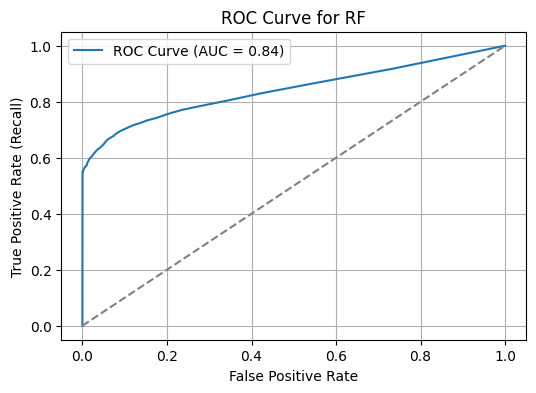

In [81]:
# predicted probabilities: using rf as example
y_proba = rf.predict_proba(X_test)[:, 1]  # get probabilities for class 1

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve for RF')
plt.legend()
plt.grid(True)
plt.show()

# mini false positive: choose a cut-off that would give true positive rate near 0.6 and false positive rate 0
# For maximizing true positive rate, have to significantly decrease the cut-off.

In [82]:
# Try different thresholds
y_proba = rf.predict_proba(X_test)[:, 1]  # get probabilities for class 1

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_thresh, average='binary')
    print(f"Threshold: {thresh:.2f} | Precision: {precision:.3f} | Recall: {recall:.2f} | F1: {f1:.3f}")

Threshold: inf | Precision: 0.000 | Recall: 0.00 | F1: 0.000
Threshold: 1.00 | Precision: 0.999 | Recall: 0.52 | F1: 0.687
Threshold: 1.00 | Precision: 0.999 | Recall: 0.52 | F1: 0.688
Threshold: 1.00 | Precision: 0.999 | Recall: 0.53 | F1: 0.688
Threshold: 0.99 | Precision: 0.999 | Recall: 0.54 | F1: 0.699
Threshold: 0.98 | Precision: 0.999 | Recall: 0.54 | F1: 0.701
Threshold: 0.97 | Precision: 0.999 | Recall: 0.54 | F1: 0.704
Threshold: 0.92 | Precision: 0.999 | Recall: 0.54 | F1: 0.705
Threshold: 0.91 | Precision: 0.999 | Recall: 0.55 | F1: 0.706
Threshold: 0.88 | Precision: 0.999 | Recall: 0.55 | F1: 0.707
Threshold: 0.80 | Precision: 0.999 | Recall: 0.55 | F1: 0.707
Threshold: 0.72 | Precision: 0.998 | Recall: 0.55 | F1: 0.707
Threshold: 0.70 | Precision: 0.997 | Recall: 0.55 | F1: 0.707
Threshold: 0.69 | Precision: 0.997 | Recall: 0.55 | F1: 0.707
Threshold: 0.68 | Precision: 0.996 | Recall: 0.55 | F1: 0.707
Threshold: 0.67 | Precision: 0.995 | Recall: 0.55 | F1: 0.708
Threshold

/Users/wentinggao/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [83]:
# use the approach of maximizing true positive rate - false positive rate
error_cutoff=pd.DataFrame({'cutoff':pd.Series(thresholds),
                               'class0_error':pd.Series(fpr),
                               'class1_error': 1 - pd.Series(tpr) # 1-tpr = fnr
                                })

In [84]:
error_cutoff['optimal_value'] = 1-error_cutoff['class1_error']-error_cutoff['class0_error']

In [85]:
error_cutoff.sort_values('optimal_value', ascending=False).head(1)
#class0 error: false positive
# class1 error: false negative

cutoff  class0_error  class1_error  optimal_value
81    0.15      0.079977      0.313677       0.606347

In [86]:
#recall: mini false negative
# precision: mini false positive


## What kinds of users are more likely to be classified as at risk?
## What are their characteristics?


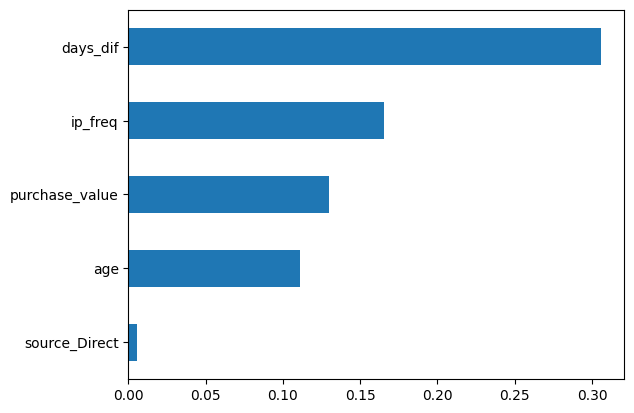

In [88]:
# use RF as example
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns).head(5)
feat_importances.sort_values().plot(kind='barh')
plt.show()

In [554]:
X_train['source_Direct'].value_counts()

source_Direct
0.0    96389
1.0    24500
Name: count, dtype: int64

In [570]:
np.var(X_train['source_Direct'])

np.float64(0.16159204935825572)

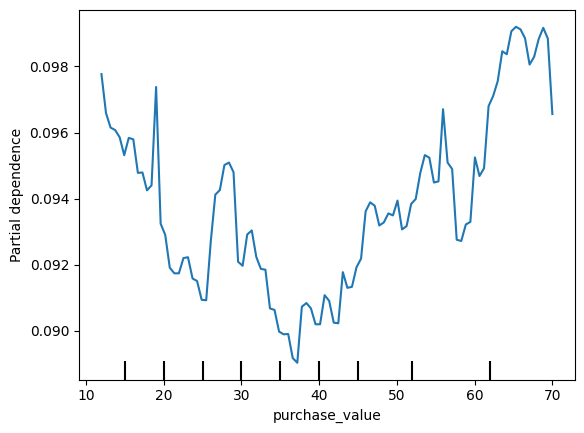

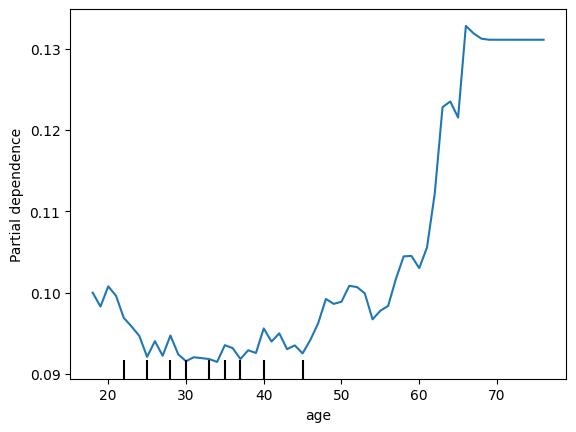

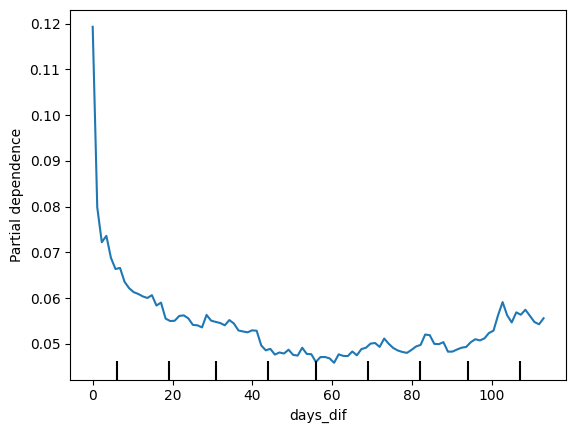

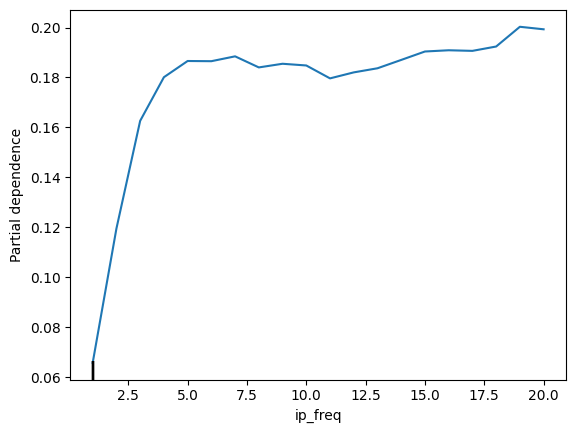

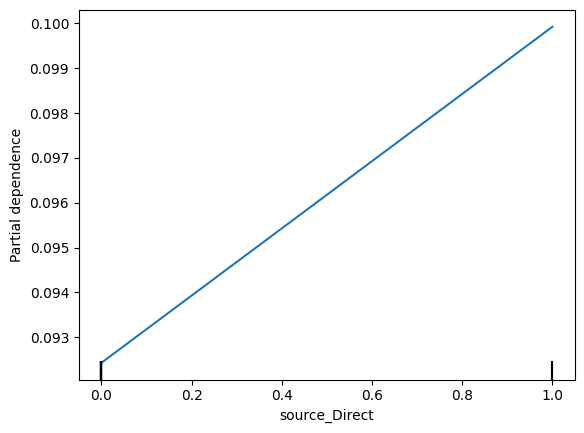

In [90]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence


# Why Use Training Data:
# PDP evaluates the model’s behavior, not performance.

# Using X_train ensures:

# All features are present and aligned

# The model saw this data (no missing encodings or unexpected values)


i=0
while(i<len(feat_importances)):
    #plot the results
    display = PartialDependenceDisplay.from_estimator(rf, X_train, [i, ])
    plt.show()
    #closing right after opening for the for loop to work in the markdown
    plt.close()
    i=i+1

In [ ]:

# very high & low purchase values increases predicted prob of fraud
# if user purchases on the same day as signup,  increases predicted prob of fraud
# different user uses same ip -> increases predicted prob of fraud
#  user from direct source -> increases predicted prob of fraud

In [1]:
# https://github.com/scikit-learn/scikit-learn/issues/30675
# issue for pdp 
import sklearn
print(sklearn.__version__)

1.5.2
